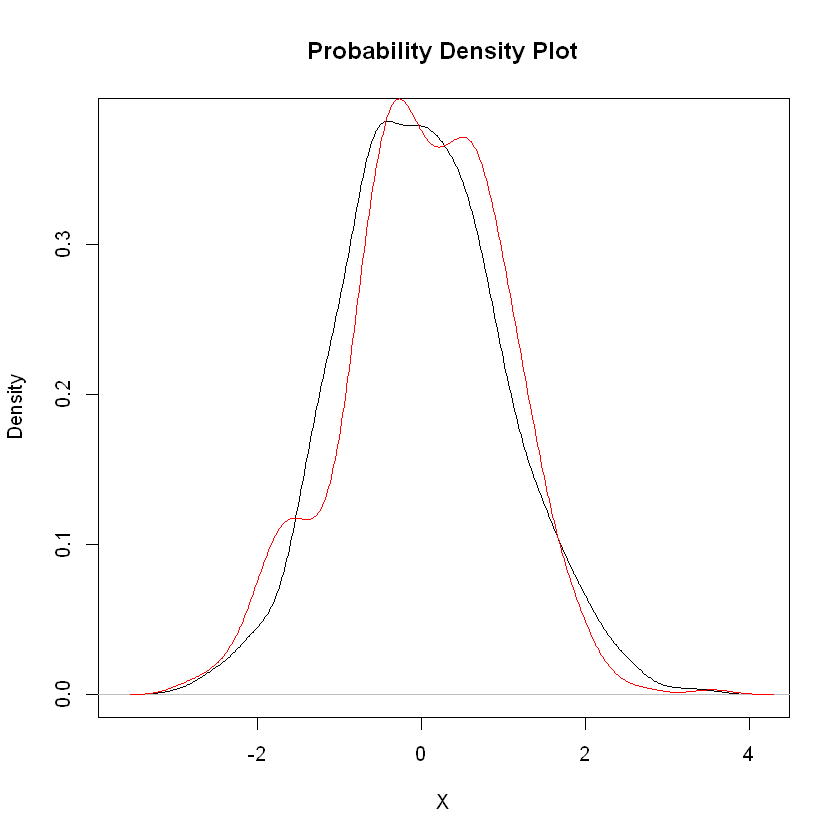

In [3]:
# 生成示例数据
data1 <- rnorm(1000)  # 生成1000个符合标准正态分布的随机数
data2 <- rnorm(500)
# 计算概率密度估计
density_est1 <- density(data1)
density_est2 <- density(data2)

# 绘制概率密度图
plot(density_est1, main = "Probability Density Plot", xlab = "X", ylab = "Density")
# 绘制第一个概率密度图
# plot(density_est1, main = "Probability Density Comparison", xlab = "X", ylab = "Density")

# 将第二个概率密度图添加到图上
lines(density_est2, col = "red")

In [4]:
# overall
energy <- read.table("../data/residuals_energy.txt", header = TRUE)
energy_all_res = energy$x
finance <- read.table("../data/residuals_finance.txt", header = TRUE)
finance_all_res = finance$V1

In [5]:
# before
energy <- read.table("../data/residuals_energy_FY.txt", header = TRUE)
energy_before_res = energy$V1
fn <- read.table("../data/residuals_finance_FY.txt", header = TRUE)
finance_before_res = fn$V1

In [6]:
# after
energy = read.table("../data/hcx_residuals_energy_after_event.txt")
energy_after_res = energy$V1
library("readxl")

finance = read_excel("../data/standardized_residual_Finance.xlsx")
finance_after_res = finance$V1

In [8]:
# standize
energy_all_res = (energy_all_res - mean(energy_all_res))/sd(energy_all_res)
finance_all_res = (finance_all_res - mean(finance_all_res))/sd(finance_all_res)

In [10]:
# standize
energy_before_res = (energy_before_res - mean(energy_before_res))/sd(energy_before_res)
finance_before_res = (finance_before_res - mean(finance_before_res))/sd(finance_before_res)

In [18]:
length(energy_all_res)
length(energy_before_res)
length(energy_after_res)

[1] 160

[1] 472

[1] 490

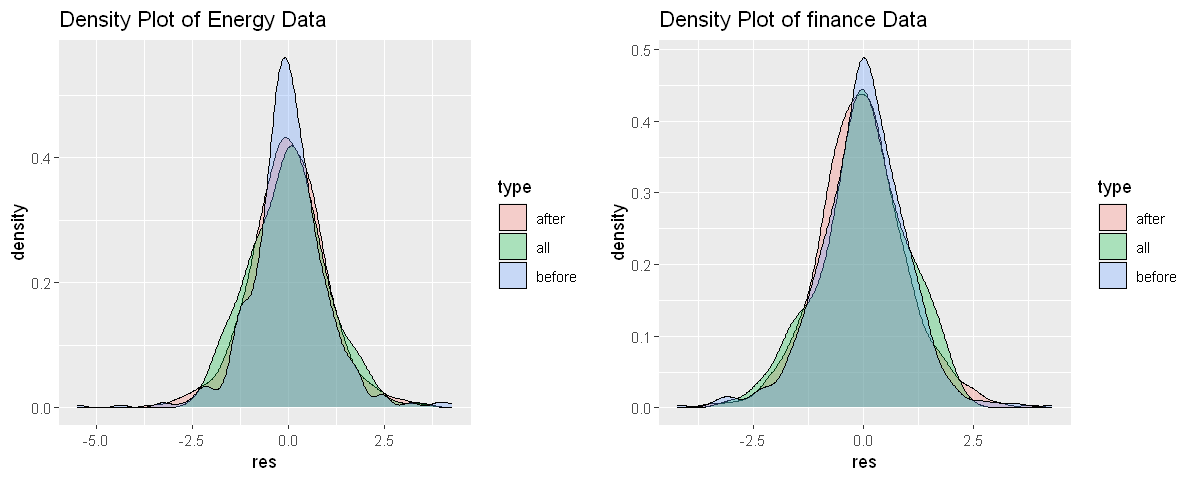

In [23]:
library(ggplot2)
library(gridExtra)

energy_data = data.frame(res=c(energy_all_res, energy_before_res, energy_after_res), type=c(rep('all', 160), rep('before', 472), rep('after', 490)))

# 预处理：将smoke变量转换为因子类型
energy_data$type = factor(energy_data$type)
 
# 基函数：x设置目标变量，fill设置填充色
p1 = ggplot(energy_data, aes(x = res, fill = type)) +
  # 密度曲线函数：alpha设置填充色透明度
  geom_density(alpha = 0.3) +
  labs(title = "Density Plot of Energy Data")

finance_data = data.frame(res=c(finance_all_res, finance_before_res, finance_after_res), type=c(rep('all', 160), rep('before', 472), rep('after', 490)))

# 预处理：将smoke变量转换为因子类型
finance_data$type = factor(finance_data$type)
 
# 基函数：x设置目标变量，fill设置填充色
p2 = ggplot(finance_data, aes(x = res, fill = type)) +
  # 密度曲线函数：alpha设置填充色透明度
  geom_density(alpha = 0.3) +
  labs(title = "Density Plot of finance Data")


options(repr.plot.width = 10, repr.plot.height = 4)

grid.arrange(p1, p2, ncol = 2, widths = c(0.4, 0.4), heights = c(0.6))

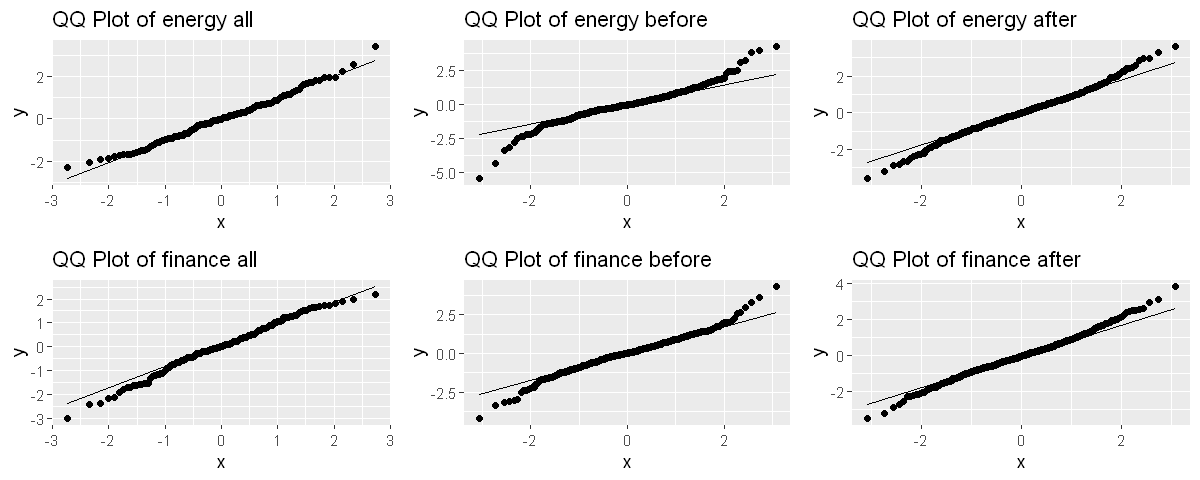

In [38]:
p1 <- ggplot(data.frame(res=energy_all_res), aes(sample = res)) +
           stat_qq() +
           stat_qq_line() +
            labs(title = "QQ Plot of energy all")


p2 <- ggplot(data.frame(res=energy_before_res), aes(sample = res)) +
           stat_qq() +
           stat_qq_line() +
            labs(title = "QQ Plot of energy before")


p3 <- ggplot(data.frame(res=energy_after_res), aes(sample = res)) +
           stat_qq() +
           stat_qq_line() +
            labs(title = "QQ Plot of energy after")


p4 <- ggplot(data.frame(res=finance_all_res), aes(sample = res)) +
           stat_qq() +
           stat_qq_line() +
            labs(title = "QQ Plot of finance all")


p5 <- ggplot(data.frame(res=finance_before_res), aes(sample = res)) +
           stat_qq() +
           stat_qq_line() +
            labs(title = "QQ Plot of finance before")


p6 <- ggplot(data.frame(res=finance_after_res), aes(sample = res)) +
           stat_qq() +
           stat_qq_line() +
            labs(title = "QQ Plot of finance after")


grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 3, nrow=2)
# widths = c(0.4, 0.4), heights = c(0.6)

In [ ]:
# 背景
# 三个问题
# 模型分析
# weekly 
# copula - wjy